## Reading the BP_GoM data

This notebook extracts a 2D line of the BP_GoM data, located in  /datawaha/swag/Datasets/BP_GoM/download/ 

The notebook is used to read the pre-processed data. 



In [13]:
import sys
from IPython.display import HTML
import json
import itertools
import os
import sys
import numpy as np
import segyio
import pandas as pd
import pywt
import segysak
from segysak.segy import segy_header_scan, segy_header_scrape, get_segy_texthead, segy_loader
from scipy import signal,ndimage,stats,io
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons



pd.set_option('display.max_columns', None)


import re 


def parse_trace_headers(segyfile, n_traces):
    '''
    Parse the segy file trace headers into a pandas dataframe.
    Column names are defined from segyio internal tracefield
    One row per trace
    '''
    # Get all header keys
    headers = segyio.tracefield.keys
    # Initialize dataframe with trace id as index and headers as columns
    df = pd.DataFrame(index=range(1, n_traces + 1),
                      columns=headers.keys())
    # Fill dataframe with all header values
    for k, v in headers.items():
        df[k] = segyfile.attributes(v)[:]
    return df


def dist(p_line,p_streamers):
    '''
    Compute the nearest point to the line 
    '''
    distance = np.sum((p_line - p_streamers)**2, axis=1)
    return np.argmin(distance)


### Define the path and create a softlink for the data 

In [2]:
# set the path to the data 'i.e.,   /something/something/BP_GoM'
dataset_path= ''

# !ls $dataset_path
# !ln -s {dataset_path}/PP_Small_Final/SEGY.PPSmall  SEGY.PPSmall 
# !ln -s {dataset_path}/PP_Large_Final/SEGY.PPLarge  SEGY.PPLarge


In [3]:
# set the directory of the data 
dirname = 'SEGY.PPLarge'
# dirname = 'SEGY.PPSmall'



### Each data file starts with the inline number of the sources. Thus, reading the files that starts with the same number will result into reading a source line  

In [4]:
# Reading one line of shot 
file_line = []
# line_id = "0920"
line_id = "0930"
# line_id = "0940"
for file in os.listdir(dirname):
    if file.startswith(line_id):
        # print(os.path.join(dirname, file))
        file_line.append(os.path.join(dirname, file))
        
        

## Extracting and concatenate the headers of these files 

In [5]:
# Reading one line of shot 

lh = pd.DataFrame()
i=0
total = len(file_line)
for i,filename in enumerate(file_line):
    print(f"Progress  {i+1}/{total}")
    headers = segy_header_scrape(filename)
    headers['data_file']=i
    headers['data_index']=  [kk for kk in range(len(headers))]
    lh = pd.concat((lh,headers), ignore_index = True )
print("Done")
# Remove zero columns 
lh = lh.loc[:, (lh != 0).any(axis=0)]   


Progress  1/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  2/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  3/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  4/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  5/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  6/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  7/58


  0%|          | 0.00/45.0k [00:00<?, ? traces/s]

Progress  8/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  9/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  10/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  11/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  12/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  13/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  14/58


  0%|          | 0.00/54.6k [00:00<?, ? traces/s]

Progress  15/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  16/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  17/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  18/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  19/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  20/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  21/58


  0%|          | 0.00/54.6k [00:00<?, ? traces/s]

Progress  22/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  23/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  24/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  25/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  26/58


  0%|          | 0.00/54.7k [00:00<?, ? traces/s]

Progress  27/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  28/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  29/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  30/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  31/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  32/58


  0%|          | 0.00/51.4k [00:00<?, ? traces/s]

Progress  33/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  34/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  35/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  36/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  37/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  38/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  39/58


  0%|          | 0.00/54.6k [00:00<?, ? traces/s]

Progress  40/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  41/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  42/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  43/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  44/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  45/58


  0%|          | 0.00/54.6k [00:00<?, ? traces/s]

Progress  46/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  47/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  48/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  49/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  50/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  51/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  52/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  53/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  54/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  55/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  56/58


  0%|          | 0.00/54.7k [00:00<?, ? traces/s]

Progress  57/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Progress  58/58


  0%|          | 0.00/57.9k [00:00<?, ? traces/s]

Done


In [6]:
# Remove unused columns
lh.drop(['TRACE_SEQUENCE_LINE','EnergySourcePoint','CDP','CDP_TRACE',\
         'NSummedTraces','NStackedTraces','DataUse','ReceiverDatumElevation','SourceDatumElevation',\
        'ElevationScalar','CoordinateUnits','CoordinateUnits','SweepFrequencyStart','Correlated','InstrumentInitialGain',\
        'SweepLength','SweepType','SweepFrequencyStart','SweepFrequencyEnd','SweepTraceTaperLengthStart','SweepTraceTaperLengthStart',\
        'WeatheringVelocity','SweepTraceTaperLengthEnd','AliasFilterSlope','YearDataRecorded','DayOfYear',\
        'HourOfDay','MinuteOfHour','SecondOfMinute','TimeBaseCode','OverTravel','TransductionConstantMantissa',\
        'TransductionUnit','TraceIdentifier','SourceType','SourceEnergyDirectionMantissa','SourceEnergyDirectionExponent',\
        'SourceMeasurementMantissa','SourceMeasurementExponent','SourceMeasurementUnit'], axis=1,inplace=True)


In [7]:
# Check the headers 

lh.head(3)

,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,offset,ReceiverGroupElevation,SourceDepth,GroupWaterDepth,SourceGroupScalar,SourceX,SourceY,GroupX,GroupY,TRACE_SAMPLE_COUNT,TRACE_SAMPLE_INTERVAL,CDP_X,CDP_Y,INLINE_3D,CROSSLINE_3D,ShotPoint,ScalarTraceHeader,data_file,data_index
0,31385702,1069,2,4147,11,10,1277,-10,15352836,97309111,15264888,97412925,1751,8000,15308386,97361309,7115,3726,3181,32645,0,0
1,31385703,1069,4,4151,12,10,1277,-10,15352836,97309111,15266048,97414082,1751,8000,15308966,97361884,7115,3727,3181,32645,0,1
2,31385704,1069,6,4151,12,10,1277,-10,15352836,97309111,15266048,97414082,1751,8000,15308966,97361884,7115,3727,3181,32645,0,2


array([25727.22375228, -3284.98487329])

In [8]:
# Reading one file, here I extract some parameters from one file 
filename = file_line[0]
with segyio.open(filename, ignore_geometry=True) as f:
    # Get basic attributes
    # n_traces = f.tracecount
    dt = segyio.tools.dt(f) / 1000
    n_samples = f.samples.size
    twt = f.samples

    text_headers = get_segy_texthead(filename)

print(f"""
dt: {dt}  ms
Totla recording time: {twt[-1]}  ms

Text headers
-----------------
{text_headers}
""")


dt: 8.0  ms
Totla recording time: 14000.0  ms

Text headers
-----------------
C01 (C)2020 Tiber WATS, file 0930.1380-1390.segy
C02 These data are provided by BP Exploration & Production Inc. under a
CreativeC03 Commons Attribution-NonCommercial-ShareAlike 4.0 International
License,     C04 CC-BY-NC-SA. CLIENT:BP. CONTRACTOR:CGGVERITAS. AREA:GRASP TIBER
WATS 3D, GOMC05 DATA: BP GRASP WATS 3D DATA AFTER SAILLINE DOMAIN 3D SRME
C06 LINE ID: TB10XW2881AP1071 - TB10XW3141AP1080.
C07 SAMPLE INTERVAL: 8 MS  REC LENGTH: 14000 MS
C08
C09 PROCESSING HISTORY:
C10 Input from SEGY with 2ms sample rate / Receiver motion correction /
C11 Adjust traces summation / Resample to 8ms / Shot Domain denoise /
C12 Designature and Debubble / Water column statics / Datum correction/
C13 3D SRME / Additional Debubble / Regularization on a CDP grid of 50m x 50m
C14 HEADER POSITIONS:
C15 NAME         POSITION LENGTH   NAME            POSITION  LENGTH
C16 FIELDRECORD     9       4      CHANNEL           13       

## Reading the velocity model

Note the velocity model is splitted intoparts. Here I read all the parts and concatenate the headers.

In [9]:
# Reading the velocity 
# velfile = 'p1vert.segy'

vf_list = ['p1vert.segy', 'p2vert.segy', 'p3vert.segy', 'p4vert.segy','p5vert.segy','p6vert.segy' ]
Nil=0
Nxl=0
all_vel = []
for velfile in vf_list:
    print(f"reading file {velfile}")
    with segyio.open(velfile) as f:
        n_traces = f.tracecount
        dz = segyio.tools.dt(f)/1000 * 0.3048  # *0.3048  to convert from feet to m
        z = f.samples * 0.3048  # *0.3048  to convert from feet to m
        Nil = len(f.ilines)
        Nxl = len(f.xlines)
        vel = segyio.tools.cube(f)  
        # vel = f.trace.raw[:]
    all_vel.append(vel)
all_vel = np.concatenate(all_vel[:],axis=0)
all_vel.shape

reading file p1vert.segy
reading file p2vert.segy
reading file p3vert.segy
reading file p4vert.segy
reading file p5vert.segy
reading file p6vert.segy


(1106, 1232, 3601)

#### Reading the velocity model headers 


In [14]:
# Reading the headers .
all_vel_h = []

# Reading headers 
for velfile in vf_list:
    with segyio.open(velfile) as f:
        n_traces = f.tracecount
        vel_headers = parse_trace_headers(f, n_traces)
        vel_headers = vel_headers.loc[:, (vel_headers != 0).any(axis=0)]   
        vel_headers = vel_headers.loc[:, (vel_headers != 1).any(axis=0)] 
        vel_headers.drop(['SourceGroupScalar','SourceX', 'SourceY','CDP',], axis=1,inplace=True)
    all_vel_h.append(vel_headers)
vel_h = pd.concat((all_vel_h[:]),ignore_index=True) 

### There is a mismatch between the geometry of the velocity and the geometry of the data. This can be fixed when we divide by the SouceGroupScalar header. 

In [15]:
## Fix the geometry by the scaler (This seems to align the geometry), I notice Matteo does that in his course notebook 
## For velocity the scaler is -1, so It is not affective and I don't do it. 

scaler = 1. / abs(lh['SourceGroupScalar'][0])
lh['GroupX'] = scaler * lh['GroupX']
lh['GroupY'] = scaler * lh['GroupY']
lh['SourceX'] = scaler * lh['SourceX']
lh['SourceY'] = scaler * lh['SourceY']



### Coodinates 



In [16]:

# Note the measurement are in feet, so I multiplied by 0.3048 to convert the data 
xcor,ycor = np.array(vel_h['CDP_X'])* 0.3048,np.array(vel_h['CDP_Y']) * 0.3048


xsrc = lh['SourceX'][:]  = lh['SourceX'][:] * 0.3048
ysrc = lh['SourceY'][:]  = lh['SourceY'][:] * 0.3048

xrec =  lh['GroupX'][:] = lh['GroupX'][:] * 0.3048
yrec =  lh['GroupY'][:] = lh['GroupY'][:] * 0.3048



# # Let's reshape (il, xl, 3601)
# # vell = np.reshape(all_vel,(il,xl,3601))
# xcor_cube = np.reshape(xcor,(il,xl))
# ycor_cube = np.reshape(ycor,(il,xl))

# xcor_cube.shape, ycor_cube.shape,all_vel.shape


<ipython-input-16-b0d8afd16396>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xsrc = lh['SourceX'][:]  = lh['SourceX'][:] * 0.3048
<ipython-input-16-b0d8afd16396>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ysrc = lh['SourceY'][:]  = lh['SourceY'][:] * 0.3048
<ipython-input-16-b0d8afd16396>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xrec =  lh['GroupX'][:] = lh['GroupX'][:] * 0.3048
<ipython-input-16-b0d8afd16396>:9: Sett

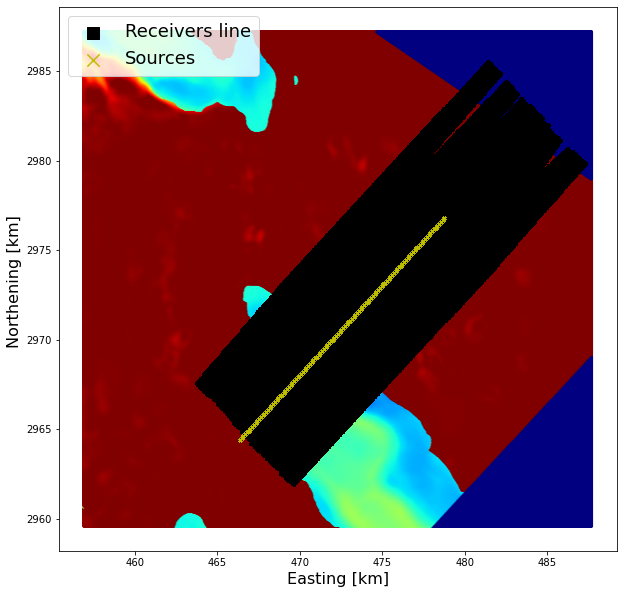

In [17]:

plt.figure(figsize=(10,10))
# plt.imshow(np.flip(all_vel[:,:,900],axis=0),vmin=1500,vmax=4600,cmap='jet', extent=[xcor[0],xcor[-1],ycor[0],ycor[-1] ])


plt.scatter(xcor/1000,ycor/1000,s=6,c=all_vel[:,:,900],cmap='jet',vmin=1500,vmax=4500)

plt.scatter(xrec/1000,yrec/1000,marker="s", s=6,color='k',label='Receivers line')
plt.scatter(xsrc/1000,ysrc/1000,marker="x", s=6,color='y',label='Sources')


plt.axis('tight')
plt.xlabel('Easting [km]',fontsize=16)
plt.ylabel('Northening [km] ',fontsize=16)
plt.legend(fontsize=18,markerscale=5.,loc='upper left')



### Let's rotate the coordinates to alight with x/y axes.  
I found by looping over many angles, that -45 is the rotation angles needed. 

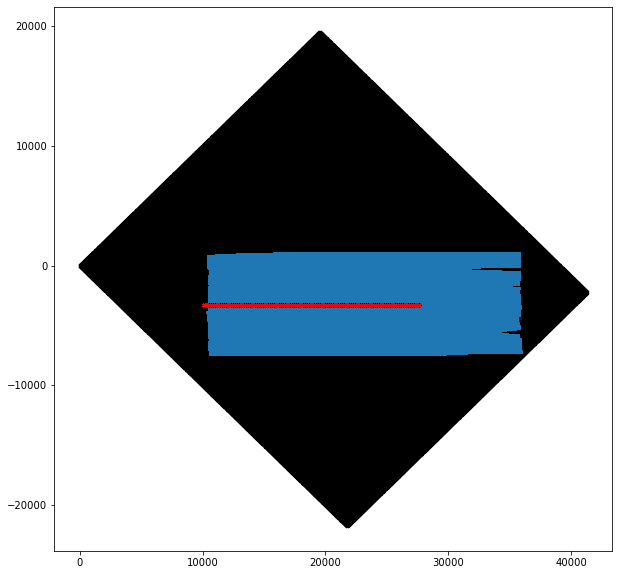

In [18]:
# Let's rotate the lines 


def rotate(x, y, ox, oy, angle):
    """Rotation

    Apply rotation matrix as in https://en.wikipedia.org/wiki/Rotation_matrix

    Parameters
    ----------
    x : :obj:`np.ndarray`
        x-coordinates
    y : :obj:`np.ndarray`
        y-coordinates
    ox : :obj:`float`
        x origin
    oy : :obj:`float`
        y origin
    angle : :obj:`float`
        Rotation angle in radiants (taken from x-axis)

    Returns
    -------
    x : :obj:`np.ndarray`
        Rotated x-coordinates
    y : :obj:`np.ndarray`
        Rotated y-coordinates

    """
    xrot, yrot = ((x - ox) * np.cos(angle) - (y - oy) * np.sin(angle)), \
                 ((x - ox) * np.sin(angle) + (y - oy) * np.cos(angle))
    return xrot, yrot



# looping between ranges of angles to see which one is best 
# for phi in range(-45,-44,1):
#     print(phi)

phi=-45
ang = phi*np.pi/180
    
xsrc,ysrc = rotate(lh['SourceX'][:],lh['SourceY'][:], \
                   lh['SourceX'][:].min() -  (lh['SourceX'][:].min() - xcor.min()), \
                   lh['SourceY'][:].min() -  (lh['SourceY'][:].min() - ycor.min()), \
                   ang)

xrec,yrec = rotate(lh['GroupX'][:],lh['GroupY'][:], \
                   lh['GroupX'][:].min() -  (lh['GroupX'][:].min() - xcor.min()), \
                   lh['GroupY'][:].min() -  (lh['GroupY'][:].min() - ycor.min()), \
                   ang)    

velx,vely = rotate(xcor,ycor,xcor[0],ycor[0],ang)
    
plt.figure(figsize=(10,10))
plt.scatter(velx,vely,marker="x", s=6,color='k')
plt.scatter(xrec,yrec,marker="s", s=6,label='Rec')    
plt.scatter(xsrc,ysrc,marker="x", s=6,color='r',label='Sources')  
    
    
plt.show()

### Let's zoom into the plot to see the geometry clearly. 
### I also select few streamer to extract the 2D line. 
selecting only one streamer will have some missing values for some shots. By choosing many streamer we can bin the closest receiver to our 2D line. 


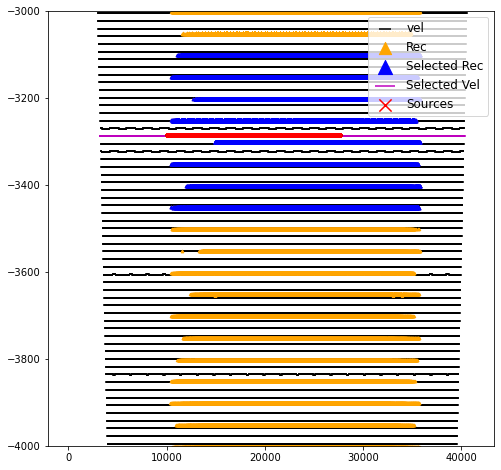

In [31]:
# Here I zoom into the plot to see the geometry clearly. 
# I also select few lines to consider
plt.figure(figsize=(8,8))
plt.scatter(velx[:],vely[:],marker="_",color='k',s=6,label='vel')
plt.scatter(xrec[:],yrec[:],marker="^",color='orange', s=6,label='Rec')
plt.scatter(xrec[ (yrec<-3100) & (yrec>-3500) ],yrec[ (yrec<-3100) & (yrec>-3500)],marker="^", s=8,color='b',label='Selected Rec')
plt.scatter(velx[ (vely<-3280) & (vely>-3290) ],vely[ (vely<-3280) & (vely>-3290)],marker="_", s=15,color='m',label='Selected Vel')

plt.scatter(xsrc[:],ysrc[:],marker="x", s=6,color='r',label='Sources')


plt.ylim([-4000,-3000])
# plt.xlim([10000,30000])
plt.legend(fontsize=12, markerscale=5.,loc='upper right')




In [32]:
# Get the index of the selected values 
vidx = np.where(np.logical_and(vely<-3280,vely>-3290 ))[0] 

ridx = np.where(np.logical_and(yrec>-3500,yrec < -3100 ))[0] 



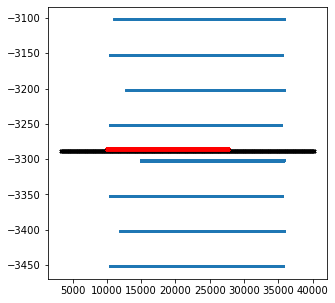

In [33]:
# The selected lines
# source 2d
ysrc[:] = np.median(ysrc)
# yrec[ridx] = np.median(yrec[ridx])
vely[vidx] = np.median(vely[vidx])


plt.figure(figsize=(5,5))
plt.scatter(velx[vidx],vely[vidx],marker="x",color='k',s=8,label='vel')
plt.scatter(xrec[ridx],yrec[ridx],marker="s", s=6,label='Rec')
plt.scatter(xsrc[:],ysrc[:],marker="x", s=6,color='r',label='Sources')



### Extracting the 2D velocity line 

(1046, 3601)
shape after removeing zeros: (881, 3601)


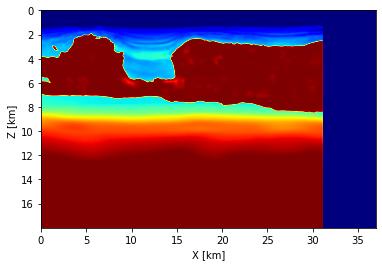

In [34]:
all_vel_2d = all_vel.reshape(all_vel.shape[0]*all_vel.shape[1],-1)
all_vel_2d = all_vel_2d[vidx,:]
print(all_vel_2d.shape)

# Horizantal Dimension 
ox = 0 
fx = velx[vidx[-1]] - velx[vidx[0]]


# plt.imshow(all_vel_2d.T,cmap='jet',vmin=1500,vmax=4500,\
#           extent=(velx[idx[0]], velx[idx[-1]], z[-1] * 0.3048, z[0]* 0.3048) )
# plt.ylabel('Z [m]')
# plt.xlabel('X [m]')
# plt.axis('tight')



plt.imshow(all_vel_2d.T,cmap='jet',vmin=1500,vmax=4500,\
          extent=(ox/1000, fx/1000, z[-1] /1000, z[0]/1000) )
plt.ylabel('Z [km] ')
plt.xlabel('X [km]')
plt.axis('tight')

print(f"shape after removeing zeros: {all_vel_2d[~np.all(all_vel_2d == 0, axis=1)].shape}")


In [226]:
# remove zeros
all_vel_2d= all_vel_2d[~np.all(all_vel_2d == 0, axis=1)]
nx,nz = all_vel_2d.shape

# np.save('BPGoM.np',all_vel_2d)

## Extracting the selected 2D line from the data 

In [35]:
# Extract from the 2d line from the data  

lh['SelectedRx'] = None
lh['SelectedRy'] = None
lh.loc[ridx,'SelectedRx'] = xrec
lh.loc[ridx,'SelectedRy'] = yrec

# It is not necesseary to define th shots since they are into a line already, but I add them for completeness.
lh['SelectedSx'] = None
lh['SelectedSy'] = None
lh.loc[:,'SelectedSx'] = xsrc
lh.loc[:,'SelectedSy'] = ysrc


selected_lh = lh.dropna(inplace=False) 


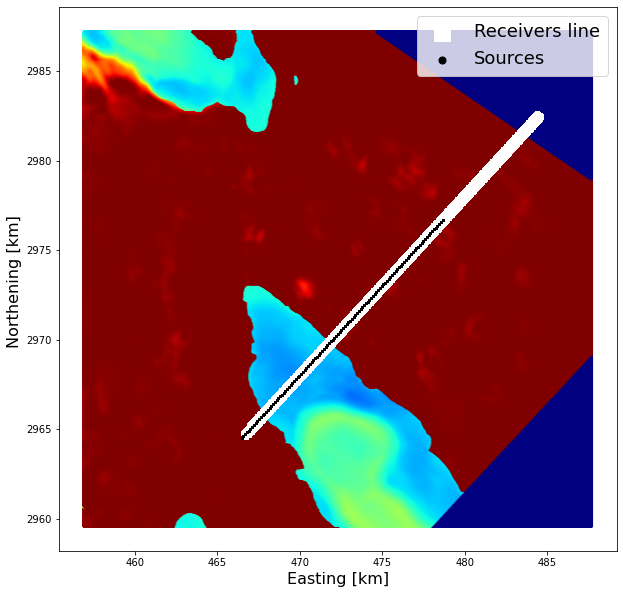

In [36]:
# plot selected 
plt.figure(figsize=(10,10))
plt.scatter(xcor/1000,ycor/1000,s=6,c=all_vel[:,:,900],cmap='jet',vmin=1500,vmax=4500)
plt.scatter(selected_lh['GroupX'][:]/1000,selected_lh['GroupY'][:]/1000,marker="s", s=10,color='w',label='Receivers line')
plt.scatter(selected_lh['SourceX'][:]/1000,selected_lh['SourceY'][:]/1000,marker=".", s=8,color='k',label='Sources')

plt.axis('tight')
plt.xlabel('Easting [km]',fontsize=16)
plt.ylabel('Northening [km] ',fontsize=16)
plt.legend(fontsize=18,markerscale=5.,loc="upper right")
plt.show()

In [148]:

# Sourt based the x location 
selected_lh2 = selected_lh.sort_values('SelectedSx',ignore_index=True)

# Group based on different shot 
selected_lh2.loc[:,'SHOT_ID'] = selected_lh2.groupby('SelectedSx').ngroup()
print(f'Assign SHOT_IDs for {selected_lh2.SHOT_ID.nunique()} shots')


Assign SHOT_IDs for 116 shots


In [149]:
# To specify one shot 
shot_num = 0
shot_h = selected_lh2[ (selected_lh2['SHOT_ID']==shot_num) ]

shot_h = shot_h.sort_values('SelectedRx',ignore_index=True)
shot_h = shot_h.drop_duplicates('SelectedRx')
shot_h = shot_h.reset_index()

#### I will define a line with the following parameters: 

Min.Off: 0.242 km
Max.Off: 8.192 km 

50 m  receiver spacing
150 m  source spaceing 

Note these parameters are derived from the data except I place the line on the shot y-coordinates. 

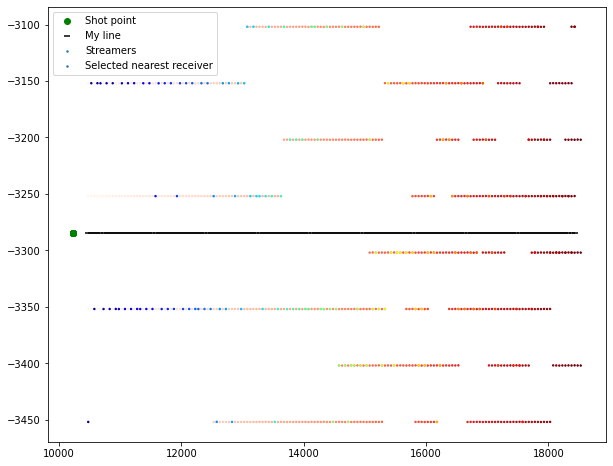

In [151]:


    
MinOff = 242
MaxOff = 8193
spacing = 50

# Define the line coord
linex = np.arange(shot_h['SelectedSx'][0]+MinOff,shot_h['SelectedSx'][0]+MaxOff,spacing)
liney = np.ones_like(linex) * shot_h['SelectedSy'][0]



# line = np.concatenate((linex.reshape(-1,1),liney.reshape(-1,1)),axis=1)
# streamers = np.concatenate((np.array(shot_h['SelectedRx'][:]).reshape(-1,1),np.array(shot_h['SelectedRy'][:]).reshape(-1,1)),axis=1)

# I only consider y-axis when computing the distance 
line = linex.reshape(-1,1)
streamers = np.array(shot_h['SelectedRx'][:]).reshape(-1,1)



# Number of recevers
nrec = linex.shape[0]


my_streamer= []
for pt in line: 
    my_streamer.append(dist(pt,streamers))
    

    
plt.figure(figsize=(10,8))
plt.scatter(shot_h['SelectedSx'],shot_h['SelectedSy'],label='Shot point',color='g')

plt.scatter(linex,liney,color='k',marker='_',label='My line')

plt.scatter(shot_h['SelectedRx'],shot_h['SelectedRy'],c=np.arange(shot_h['SelectedRy'].shape[0]),
           cmap='Reds',s=2,label='Streamers')

plt.scatter(shot_h['SelectedRx'][my_streamer],shot_h['SelectedRy'][my_streamer],c=np.arange(shot_h['SelectedRy'][my_streamer].shape[0]),
           cmap='jet',s=2,label='Selected nearest receiver')


plt.legend(loc='upper left')

In [152]:
# Select only mystreamer


In [153]:
# Reading binary data
filename = file_line[ np.array(shot_h['data_file'])[0]]
with segyio.open(filename, ignore_geometry=True) as f:
    data = f.trace.raw[:]  # Get all data into memory (could cause problem on big files)





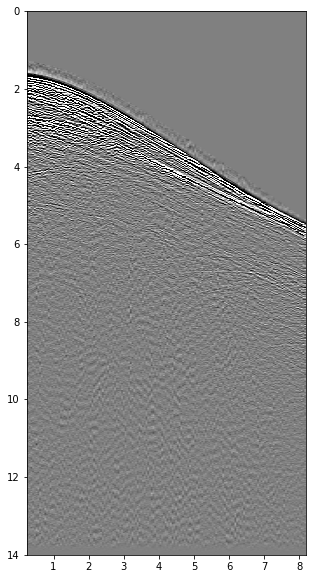

In [154]:

def plot_shot(shot, title='', pclip=1.0, colorbar=False, **kwargs):
    # vlim = pclip * np.max(np.abs(shot)); 
    vlim = np.percentile(shot, pclip)
    kwargs['vmin'] = -vlim if not 'vmin' in kwargs.keys() else kwargs['vmin']
    kwargs['vmax'] = vlim if not 'vmax' in kwargs.keys() else kwargs['vmax']
    extent = kwargs.pop('extent', None)          
    if extent == None: plt.imshow(shot.T, cmap='gray',interpolation='antialiased', **kwargs); 
    else: plt.imshow(shot.T, cmap='gray',interpolation='antialiased',extent=extent ,**kwargs)
    if colorbar: plt.colorbar()
    plt.title(title); plt.axis('auto')

plt.figure(figsize=(5,10))
plot_shot(data[np.array(shot_h.data_index),:], pclip=95,extent=[0.242,8.19,twt[-1]/1000,twt[0]])


### Filter the data for visualization

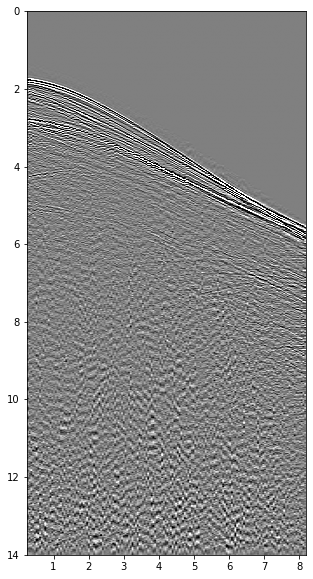

In [158]:
from scipy.signal import butter, lfilter, freqz

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Get the filter coefficients so we can check its frequency response.
# b, a = butter_lowpass(20, 1/dt*1000, 6)

current_d = data[np.array(shot_h.data_index),:]
y = butter_bandpass_filter(current_d,3, 20, 1/dt*1000, 6)


plt.figure(figsize=(5,10))
plot_shot(y*(twt/1000)**1.5,pclip=98,extent=[0.242,8.19,twt[-1]/1000,twt[0]])

# Generating the data file 
Here I will repeat the above steps but with looping over all the shots

In [174]:
ns = len(selected_lh2['SHOT_ID'].unique())
nr = nrec  # This has been define above when I generated my streamer line
nt = twt.shape[0]
MinOff = 242
MaxOff = 8193
spacing = 50

# Generate data with the shape (ns,nr,nt)
data_3d = np.zeros((ns,nr,nt))


for shot_num in range(ns): 

    print(f"Shot {shot_num+1}/{ns}")
    shot_h = selected_lh2[ (selected_lh2['SHOT_ID']==shot_num) ]

    shot_h = shot_h.sort_values('SelectedRx',ignore_index=True)
    shot_h = shot_h.drop_duplicates('SelectedRx')
    shot_h = shot_h.reset_index()
    
    linex = np.arange(shot_h['SelectedSx'][0]+MinOff,shot_h['SelectedSx'][0]+MaxOff,spacing)
    liney = np.ones_like(linex) * shot_h['SelectedSy'][0]
    # I only consider y-axis when computing the distance 
    line = linex.reshape(-1,1)
    streamers = np.array(shot_h['SelectedRx'][:]).reshape(-1,1)
    my_streamer= []
    for pt in line: 
        my_streamer.append(dist(pt,streamers))
    shot_h = shot_h.loc[my_streamer] 
    
    filename = file_line[ np.array(shot_h['data_file'])[0]]
    with segyio.open(filename, ignore_geometry=True) as f:
        data = f.trace.raw[:]  # Get all data into memory (could cause problem on big files)

        
        
    data_3d[shot_num,:,:] = data[np.array(shot_h.data_index),:]


Shot 0
Shot 1
Shot 2
Shot 3
Shot 4
Shot 5
Shot 6
Shot 7
Shot 8
Shot 9
Shot 10
Shot 11
Shot 12
Shot 13
Shot 14
Shot 15
Shot 16
Shot 17
Shot 18
Shot 19
Shot 20
Shot 21
Shot 22
Shot 23
Shot 24
Shot 25
Shot 26
Shot 27
Shot 28
Shot 29
Shot 30
Shot 31
Shot 32
Shot 33
Shot 34
Shot 35
Shot 36
Shot 37
Shot 38
Shot 39
Shot 40
Shot 41
Shot 42
Shot 43
Shot 44
Shot 45
Shot 46
Shot 47
Shot 48
Shot 49
Shot 50
Shot 51
Shot 52
Shot 53
Shot 54
Shot 55
Shot 56
Shot 57
Shot 58
Shot 59
Shot 60
Shot 61
Shot 62
Shot 63
Shot 64
Shot 65
Shot 66
Shot 67
Shot 68
Shot 69
Shot 70
Shot 71
Shot 72
Shot 73
Shot 74
Shot 75
Shot 76
Shot 77
Shot 78
Shot 79
Shot 80
Shot 81
Shot 82
Shot 83
Shot 84
Shot 85
Shot 86
Shot 87
Shot 88
Shot 89
Shot 90
Shot 91
Shot 92
Shot 93
Shot 94
Shot 95
Shot 96
Shot 97
Shot 98
Shot 99
Shot 100
Shot 101
Shot 102
Shot 103
Shot 104
Shot 105
Shot 106
Shot 107
Shot 108
Shot 109
Shot 110
Shot 111
Shot 112
Shot 113
Shot 114
Shot 115


In [227]:
# Geometry information 

# Correct location with reference to 0 on the line 
selected_lh2['SelectedSx'] = selected_lh2['SelectedSx']-velx[vidx][0]
selected_lh2['SelectedRx'] = selected_lh2['SelectedRx']-velx[vidx][0]


print(f'''

        Seismic data  
        ---------------------------------------
        Number of points 
        ns = {ns} number of sources
        nr = {nr} number of receivers
        nt = {nt} time samples 
        
        Spacing
        ds = {np.round(np.mean(np.gradient(selected_lh2['SelectedSx'].unique())),2)} m
        dr = {spacing} m 

        Origins 
        os = {np.round(selected_lh2['SelectedSx'][0],2)} m 
        or = {np.round(selected_lh2['SelectedRx'][0],2)} m 
        
        offset
        Min.Offset = {MinOff} m
        Max.Offset = {MaxOff} m      
        
        
        Velocity
        ---------------------------------------
        Number of points 
        nx = {nx}
        nz = {nz}

        Spacing 
        dx = {np.round(np.mean(np.gradient(velx[vidx])),2)} m
        dz = {np.round(dz,2)} m 
        

      ''')



        Seismic data  
        ---------------------------------------
        Number of points 
        ns = 116 number of sources
        nr = 160 number of receivers
        nt = 1751 time samples 
        
        Spacing
        ds = 150.0 m
        dr = 50 m 

        Origins 
        os = 6947.44 m 
        or = 12439.46 m 
        
        offset
        Min.Offset = 242 m
        Max.Offset = 8193 m      
        
        
        Velocity
        ---------------------------------------
        Number of points 
        nx = 881
        nz = 3601

        Spacing 
        dx = 35.36
        dz = 5.0 m 
        

      


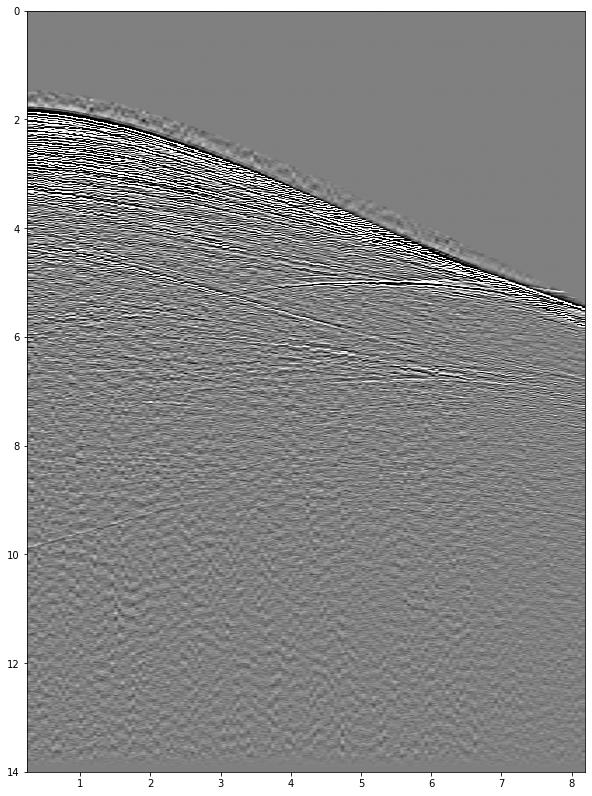

In [182]:
sidx = 20
plt.figure(figsize=(10,14))
plot_shot(data_3d[sidx], pclip=95,extent=[0.242,8.19,twt[-1]/1000,twt[0]])


In [228]:
# save the data 
np.save('data_9030.npy',data_3d)

# save the source and receiver coordinates 
### ToDo 